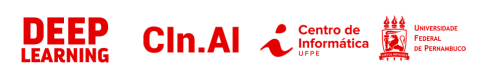

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 14.4 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModelWithLMHead
import torch

tokenizer = AutoTokenizer.from_pretrained("pierreguillou/gpt2-small-portuguese")
model = AutoModelWithLMHead.from_pretrained("pierreguillou/gpt2-small-portuguese")

# define o tamanho máximo da sentença para 1024 caracteres
tokenizer.model_max_length=1024

model.eval()  # desabilita dropout (estamos utilizando apenas como execução do modelo já pré-treinado)


/usr/local/lib/python3.8/dist-packages/transformers/models/auto/modeling_auto.py:1248: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dro

## Gerando uma palavra

In [ ]:
# input sequence
text = "Quem foi Machado de Assis? Machado de Assis foi um"

In [ ]:
inputs = tokenizer(text, return_tensors="pt")

# model output
outputs = model(**inputs, labels=inputs["input_ids"])

In [ ]:
loss, logits = outputs[:2]
print("loss: ", loss)

predicted_index = torch.argmax(logits[0, -1, :]).item()
predicted_text = tokenizer.decode([predicted_index])

# results
print('input text:', text)
print('predicted text:', predicted_text)

loss:  tensor(3.2219, grad_fn=<NllLossBackward0>)
input text: Quem foi Machado de Assis? Machado de Assis foi um
predicted text:  dos


## Gerando uma sentença completa

### Top-k

In [ ]:
inputs = tokenizer(text, return_tensors="pt")

# Saída do modelo utilizando a amostragem Top-k para geração do texto
sample_outputs = model.generate(inputs.input_ids,
                                pad_token_id=50256,
                                do_sample=True,
                                max_length=500,
                                top_k=40,
                                num_return_sequences=1)

# generated sequence
for i, sample_output in enumerate(sample_outputs):
    print(">> Generated text {}\n\n{}".format(i+1, tokenizer.decode(sample_output.tolist())))

>> Generated text 1

Quem foi Machado de Assis? Machado de Assis foi um dos primeiros jornalistas modernos a se envolver com os temas de gênero e ficção. 

É uma das principais figuras no movimento das vanguardas do fim do século XX, que se manifesta nas décadas de


### Top-p

In [ ]:
inputs = tokenizer(text, return_tensors="pt")

# Saída do modelo utilizando a amostragem Top-k para geração do texto
sample_outputs = model.generate(inputs.input_ids,
                                pad_token_id=50256,
                                do_sample=True,
                                max_length=50,
                                top_p=0.6,
                                num_return_sequences=1)

# generated sequence
for i, sample_output in enumerate(sample_outputs):
    print(">> Generated text {}\n\n{}".format(i+1, tokenizer.decode(sample_output.tolist())))

>> Generated text 1

Quem foi Machado de Assis? Machado de Assis foi um grande escritor, jornalista, crítico literário e tradutor.

Em 1922, Machado de Assis recebeu o título de Doutor em Letras pela Universidade de Coimbra.

A partir de 1923, Machado de


### Temperatura

In [ ]:
inputs = tokenizer(text, return_tensors="pt")

# Saída do modelo utilizando a amostragem Top-k para geração do texto
sample_outputs = model.generate(inputs.input_ids,
                                pad_token_id=50256,
                                do_sample=True,
                                max_length=50,
                                temperature=0.8,
                                num_return_sequences=1)

# generated sequence
for i, sample_output in enumerate(sample_outputs):
    print(">> Generated text {}\n\n{}".format(i+1, tokenizer.decode(sample_output.tolist())))

>> Generated text 1

Quem foi Machado de Assis? Machado de Assis foi um escritor brasileiro, nascido na cidade de São Paulo, no ano de 1920.

Durante o curso do bacharelado em artes, Machado de Assis foi influenciado pelas ideias de Eça de Queiroz, Eça de


### Todos os métodos de amostragem

In [ ]:
inputs = tokenizer(text, return_tensors="pt")

# Saída do modelo utilizando a amostragem Top-k para geração do texto
sample_outputs = model.generate(inputs.input_ids,
                                pad_token_id=50256,
                                do_sample=True,
                                max_length=50,
                                top_p=0.6,
                                temperature=0.8,
                                top_k=50,
                                num_return_sequences=1)

# generated sequence
for i, sample_output in enumerate(sample_outputs):
    print(">> Generated text {}\n\n{}".format(i+1, tokenizer.decode(sample_output.tolist())))

>> Generated text 1

Quem foi Machado de Assis? Machado de Assis foi um escritor brasileiro.

Em seu livro "O Tempo e o Modo", de 1969, Machado de Assis descreve o período em que viveu, e o período de sua vida.

O livro


# Utilizando a API da OpenAI para o GPT-3

In [ ]:
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 2.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for openai: filename=openai-0.26.5-py3-none-any.whl size=67620 sha256=8a4667febc20a7da31a98efb440470f806729cfdbd6e173b0e18d0baef8a2724
  Stored in directory: /root/.cache/pip/wheels/a7/47/99/8273a59fbd59c303e8ff175416d5c1c9c03a2e83ebf7525a99
Successfully built openai


In [ ]:
import openai

# Set up the OpenAI API client
openai.api_key = "YOUR_API_KEY"

# Set up the model and prompt
model_engine = "text-davinci-003"
prompt = "Hello, how are you today?"

# Generate a response
completion = openai.Completion.create(
    engine=model_engine,
    prompt=prompt,
    max_tokens=1024,
    n=1,
    stop=None,
    temperature=0.5,
)

response = completion.choices[0].text
print(response)